In [60]:
dataa = pd.read_csv("DistanceMatrix")

AxesSubplot(0.125,0.125;0.62x0.755)


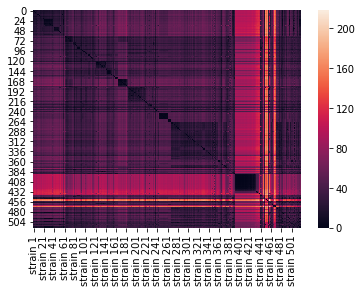

In [61]:
import seaborn as sns
print(sns.heatmap(dataa))

In [15]:
from sklearn.decomposition import PCA


#performing PCA on my pandas dataframe 
pca = PCA(n_components=10,svd_solver='full') #can specify n, since with no prior knowledge, I use None
principalComponents = pca.fit_transform(dataa)
principalDf = pd.DataFrame(data = principalComponents, columns = ["principal component " + str(i) for i in range(1,11)])

In [16]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-149.266117,141.271180,232.168432,-56.946880,-29.019579,8.972298,7.011067,5.233502,-15.290198,-3.476272
1,-181.210494,123.065436,223.655927,-50.548695,-27.427517,6.625854,7.549977,4.123703,-14.774765,-4.167120
2,-91.117696,154.173783,231.767323,-57.702244,-33.790820,5.204061,9.609953,4.458384,-14.947945,4.025742
3,-112.916854,160.376105,239.284416,-60.439406,-30.258784,6.379793,10.604413,9.188806,-13.696823,-4.407198
4,-29.175747,184.439204,235.913699,-49.545655,-21.389239,-1.694885,9.422272,20.831208,15.286669,9.158867


In [17]:
#merging my final dataframe with their regions and strain names
import pandas as pd
metadata_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\results\metadata.tsv', delimiter='\t')

In [18]:
metadata_df.head()

,strain,virus,accession,date,region,country,division,city,db,segment,authors,url,title,journal,paper_url
0,1_0015_PF,zika,KX447511,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447511,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
1,1_0016_PF,zika,KX447520,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447520,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
2,1_0030_PF,zika,KX447515,2013-11-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447515,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
3,1_0035_PF,zika,KX447514,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447514,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
4,1_0038_PF,zika,KX447517,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447517,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507


In [19]:
metadata_df.shape

(745, 15)

In [20]:
strains_df = pd.DataFrame(strains)
strains_df.columns = ['strain']

In [21]:
strains_df.shape

(519, 1)

In [22]:
metadata_df.shape

(745, 15)

In [23]:
result_strains = pd.merge(strains_df,metadata_df, on='strain')

In [24]:
result_strains.shape

(519, 15)

In [25]:
np.setdiff1d(strains_df['strain'].unique(),metadata_df['strain'].unique())

array([], dtype=object)

In [26]:
metadata_df['strain'].unique().shape

(745,)

In [27]:
finalDf = pd.concat([principalDf, result_strains[['region','country','strain']]], axis = 1)

In [28]:
finalDf.shape

(519, 13)

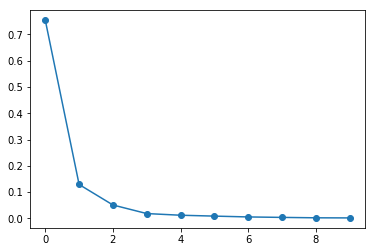

In [29]:
#explained variance for PCA plot below
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_, marker="o")

In [30]:
pca.explained_variance_

array([213659.87501795,  36582.8769128 ,  14489.80037182,   5243.46709973,
         3441.20533304,   2501.79107577,   1602.92365402,   1107.51172852,
          669.17672812,    549.63343959])

In [31]:
#look into outliers on the PCA plot and on the heat map (the strain names, the seuqences, and where are they in the phylogeny on nextstrain)

In [32]:
#plot PC2 on a number line (look into using altair)
#maybe try taking the averages of all the distances (like divide by the number of sites) or maybe disregard gaps (like don't take N)

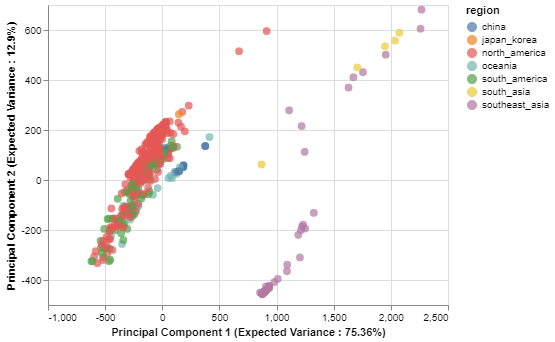

In [33]:
import altair as alt
brush = alt.selection(type='interval', resolve='global')
#link the charts
alt.Chart(finalDf).mark_circle(size=60).encode(
    x=alt.X('principal component 1',title='Principal Component 1 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[0]*100,2)) + ")"),
    y=alt.X('principal component 2',title='Principal Component 2 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[1]*100,2)) + ")"),
    color='region',
    tooltip=['strain', 'region']
).interactive()
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

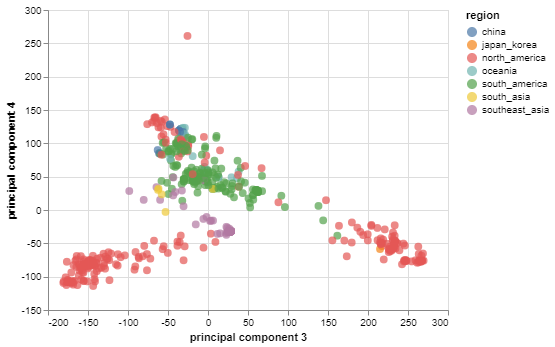

In [34]:
import altair as alt

alt.Chart(finalDf).mark_circle(size=60).encode(
    x='principal component 3',
    y='principal component 4',
    color='region',
    tooltip=['strain', 'region']
).interactive()

# Creating the Tree in Altair

In [35]:
import altair as alt
from augur.utils import json_to_tree
import json
import pandas as pd

In [36]:
# Import modules
with open('Data/zika_tree.json') as fh:
    json_tree_handle = json.load(fh)
#json_tree_handle = json.loads(requests.get("http://data.nextstrain.org/zika_tree.json").text)
# Download tree JSON file used by auspice. Despite its filename extension, the data are compressed.
#http = urllib3.PoolManager()
# = http.request('GET', "")


In [37]:
tree = json_to_tree(json_tree_handle)

In [38]:
tree

Clade(branch_length=0, clade=940, name='NODE_0000520', numdate=2007.1438944876675, strain='NODE_0000520', yvalue=510.91459311393555)

In [39]:
node_data = [
    {
        "strain": node.name,
        "date": node.attr["num_date"],
        "y": node.yvalue,
        "region": node.attr["region"],
        "country": node.attr["country"],
        "parent_date": node.parent is not None and node.parent.attr["num_date"] or node.attr["num_date"],
        "parent_y": node.parent is not None and node.parent.yvalue or node.yvalue
    }
    for node in tree.find_clades(terminal=True)
]

In [40]:
node_data[10]

{'strain': 'V20366',
 'date': 2018.7748117727583,
 'y': 507,
 'region': 'south_asia',
 'country': 'india',
 'parent_date': 2018.510007605652,
 'parent_y': 507.5}

In [41]:
node_df = pd.DataFrame(node_data)

In [42]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,516.50,southeast_asia,THA/PLCal_ZV/2013,517
1,thailand,2016.665298,2010.921473,516.50,southeast_asia,SI_BKK01,516
2,thailand,2015.043806,2010.006479,514.25,southeast_asia,SV0010/15,515
3,thailand,2016.919918,2011.367398,513.50,southeast_asia,DMSc05684_16,514
4,thailand,2013.722793,2011.367398,513.50,southeast_asia,SK403/13AS,513


In [43]:
node_df["y"] = node_df["y"].max() - node_df["y"]

In [44]:
node_df["parent_y"] = node_df["parent_y"].max() - node_df["parent_y"]

In [45]:
node_df.shape

(517, 7)

In [46]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,0.00,southeast_asia,THA/PLCal_ZV/2013,0
1,thailand,2016.665298,2010.921473,0.00,southeast_asia,SI_BKK01,1
2,thailand,2015.043806,2010.006479,2.25,southeast_asia,SV0010/15,2
3,thailand,2016.919918,2011.367398,3.00,southeast_asia,DMSc05684_16,3
4,thailand,2013.722793,2011.367398,3.00,southeast_asia,SK403/13AS,4


In [47]:
node_df["region"].unique()

array(['southeast_asia', 'south_asia', 'oceania', 'china',
       'north_america', 'south_america', 'japan_korea'], dtype=object)

In [48]:
finalDf["region"].unique()

array(['north_america', 'japan_korea', 'south_america', 'oceania',
       'china', 'southeast_asia', 'south_asia'], dtype=object)

In [49]:
merged_df = pd.merge(finalDf,node_df,on=["strain","region"]).dropna()

In [50]:
merged_df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,region,country_x,strain,country_y,date,parent_date,parent_y,y
0,-149.266117,141.271180,232.168432,-56.946880,-29.019579,8.972298,7.011067,5.233502,-15.290198,-3.476272,north_america,dominican_republic,DOM/2016/MA_WGS16_024,dominican_republic,2016.517454,2016.177960,202.000000,202
1,-181.210494,123.065436,223.655927,-50.548695,-27.427517,6.625854,7.549977,4.123703,-14.774765,-4.167120,north_america,dominican_republic,DOM/2016/BB_0180,dominican_republic,2016.298426,2015.782991,188.000000,188
2,-91.117696,154.173783,231.767323,-57.702244,-33.790820,5.204061,9.609953,4.458384,-14.947945,4.025742,north_america,dominican_republic,DOM/2016/BB_0115,dominican_republic,2016.279261,2015.738263,171.500000,172
3,-112.916854,160.376105,239.284416,-60.439406,-30.258784,6.379793,10.604413,9.188806,-13.696823,-4.407198,north_america,dominican_republic,DOM/2016/BB_0208,dominican_republic,2016.303901,2016.145963,205.000000,205
4,-29.175747,184.439204,235.913699,-49.545655,-21.389239,-1.694885,9.422272,20.831208,15.286669,9.158867,north_america,dominican_republic,DOM/2016/MA_WGS16_007,dominican_republic,2016.358658,2016.145963,205.000000,206
5,-123.743998,151.442445,229.243002,-59.239211,-30.103804,7.387241,9.118374,5.280987,-16.536129,-3.914010,japan_korea,japan,Yokohama/1/2016,japan,2016.386037,2015.816432,198.468750,198
6,-181.954366,85.723375,234.123430,-46.614163,-11.614629,-3.271421,-0.256753,22.102672,14.619749,11.130844,north_america,dominican_republic,Dominican_Rep_Rus_3ALT_2016,dominican_republic,2016.361396,2016.025840,194.375000,194
7,-166.611873,107.942511,244.226298,-50.387648,-6.218242,-3.299395,-0.167815,23.384666,12.343429,9.238888,north_america,dominican_republic,Dominican_Rep_Rus_4MRG_2016,dominican_republic,2016.394251,2015.828296,221.299805,220
8,-137.366173,132.808900,233.605828,-46.028050,-17.691688,-0.079827,4.289628,19.799161,17.293870,9.705741,north_america,dominican_republic,Dominican_Rep_Rus_5RMN_2016,dominican_republic,2016.416153,2015.906384,200.375000,200
9,-2.136458,180.924527,232.264321,-51.631900,-28.226863,-0.511141,4.924115,24.267640,21.752800,9.616615,north_america,dominican_republic,Dominican_Rep_Rus_7EGR_2016,dominican_republic,2016.651608,2016.642525,181.000000,181


# Linking the Tree with the two other PCA Plots

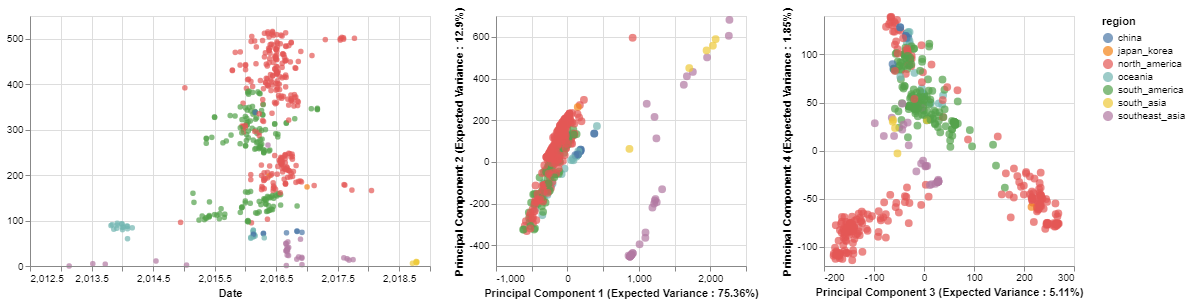

In [54]:
import altair as alt
base = alt.Chart(merged_df)
brush = alt.selection(type='interval', resolve='global')
tree_name = base.mark_circle().encode(
    x=alt.X(
        "date:Q",
        scale=alt.Scale(domain=(node_df["date"].min() - 0.2, node_df["date"].max() + 0.2)),
        title="Date"
    ),
    y=alt.Y(
        "y:Q",
        title=""
    ),
    color=alt.condition(brush, 'region:N', alt.ColorValue('gray')),
    #color="region:N",
    tooltip=["strain:N", "region:N", "date:Q"]
).add_selection(brush).properties(width=400,height=250)

#brush = alt.selection(type='interval', resolve='global')
#link the charts
pc1 = base.mark_circle(size=60).encode(
    x=alt.X('principal component 1',title='Principal Component 1 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[0]*100,2)) + ")"),
    y=alt.X('principal component 2',title='Principal Component 2 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[1]*100,2)) + ")"),
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=250,
    height=250
)
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

pc34 = base.mark_circle(size=60).encode(
    x=alt.X('principal component 3',title='Principal Component 3 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[2]*100,2)) + ")"),
    y=alt.X('principal component 4',title='Principal Component 4 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[3]*100,2)) + ")"),
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=250,
    height=250
)
#make region clickable
ChartPCA = tree_name|pc1|pc34
ChartPCA
#pc1.encode(x='principal component 1') | pc34.encode(x='principal component 3') #link the tree to this one as well

In [55]:
ChartPCA.save('../Docs/PCABrush.html')

In [52]:
#Fix the linkning of the tree AND the two PCA plots
tree.encode(x='date')|pc1.encode(x='principal component 1')|pc34.encode(x='principal component 3') 

AttributeError: 'Clade' object has no attribute 'encode'

## The below code is for the heat map -- it takes a long time to run and should only be used for debugging 

In [20]:
#Using the Hamming distance to create a similarity matrix
numbers = []
matrixOfNum = []
for i in range(0, len(genomes)):
    for j in range(0,len(genomes)):
        num = hamming_distance(genomes[i],genomes[j])
        if(len(numbers) < 3):
            numbers.append(strains[i])
            numbers.append(strains[j])
            numbers.append(num)
            matrixOfNum.append(numbers)
            numbers = []
new_data = pd.DataFrame(matrixOfNum, columns = ["Strain A", "Strain B", "distance"], dtype="float")
print(new_data)

KeyboardInterrupt: 

In [ ]:
#to to_csv on the distance dataframe and save it somewhere
#This is the heat map -- dont DONT run this cell unless you need one
alt.data_transformers.disable_max_rows()
alt.Chart(new_data).mark_rect().encode(
    x='Strain A:N',
    y='Strain B:N',
    color='distance:Q',
    tooltip = ['Strain A', "Strain B","distance"]
).interactive()


In [150]:
merged_df = pd.merge(finalDf,node_df,on=["strain","region"]).dropna()

In [196]:
s1 = {1,1,2}

In [197]:
s2 = {1,2,3,4}

In [199]:
s1.intersection(s2)

{1, 2}

In [200]:
s3 = s1 - s2

In [201]:
s3

set()

In [202]:
s4 = s2 - s1

In [1]:
s4

NameError: name 's4' is not defined